Text(0.5, 1.0, 'Original Point Cloud')

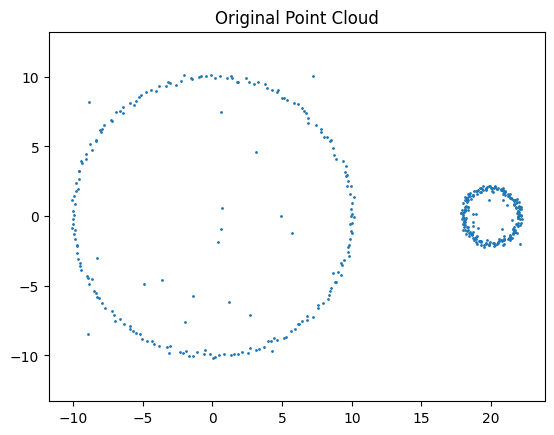

In [11]:
import numpy as np
import gudhi as gd
from Compute_PD import *
import matplotlib.pyplot as plt

def perturb(X):
    mean = np.array([0,0])
    cov = np.eye(2)*0.015
    ptb = np.random.multivariate_normal(mean, cov, X.shape[0])
    return X+ptb

def add_uni_noise(X,N):
    xy_min = [np.min(X[:,0]),np.min(X[:,1])]
    xy_max = [np.max(X[:,0]),np.max(X[:,1])]
    noise = np.random.uniform(low=xy_min, high=xy_max, size=(N,2))
    return np.r_[X,noise]

def generate_data():
    N = 200
    angles = np.linspace(0,2*np.pi,num=N)
    r1,r2 = 10,2
    c1 = np.array([[r1*np.cos(x),r1*np.sin(x)] for x in angles])
    c2 = np.array([[r2*np.cos(x),r2*np.sin(x)] for x in angles])+np.array([20,0])
    c1,c2 = add_uni_noise(perturb(c1),20),add_uni_noise(perturb(c2),20)
    return np.r_[c1,c2]

X = generate_data()
plt.scatter(X[:,0],X[:,1],s=1)
plt.axis('equal')
plt.title('Original Point Cloud')

<AxesSubplot: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

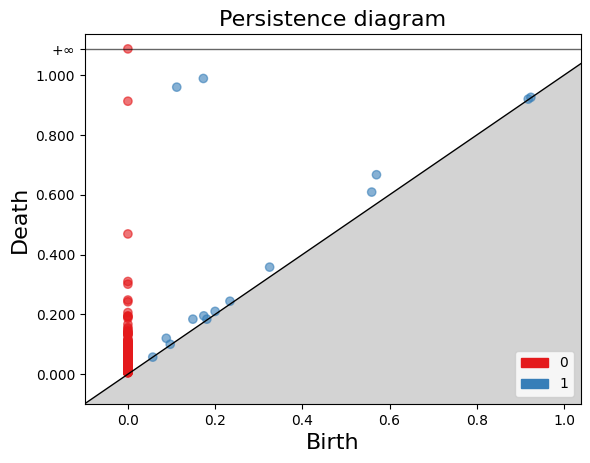

In [14]:
eta = -1 # eta=infty
psi = 16
t = 100
_,_,dgm = get_pd_lambda(X,eta,psi,t)
gd.plot_persistence_diagram(dgm,legend=True)